In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [54]:
housing_raw = pd.read_csv("D:/STUDIES/Data Visualization/Data/housing_data.csv", 
                          parse_dates=['period_begin', 'period_end'], 
                          dtype={'total_homes_sold':'Int32', 'region_name': 'category'})

housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [6]:
ca_housing = (housing_raw.loc[(housing_raw["region_name"].str.contains("CA"))]\
                .assign(region_name = housing_raw["region_name"].str[0:-11])\
                .set_index("period_begin"))

In [14]:
sales_total = ca_housing.query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")\
                .groupby("region_name")\
                .agg({"total_homes_sold":"sum"})

In [15]:
sales_total.head()

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


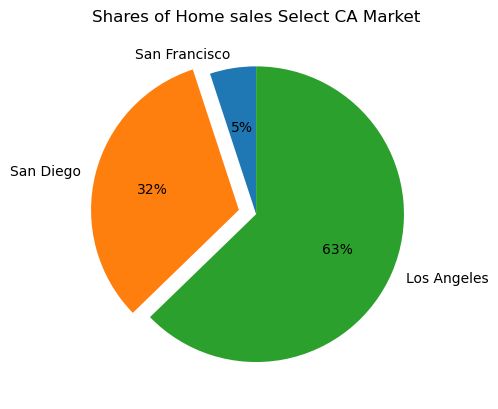

In [28]:
# creating a pie chart

fig, ax = plt.subplots()

ax.pie(
    x = sales_total["total_homes_sold"][::-1],
    startangle=90,
    labels=["San Francisco", "San Diego", "Los Angeles"],
    autopct="%.0f%%",
    explode = (0, .12, 0)
    
)

ax.set_title("Shares of Home sales Select CA Market");

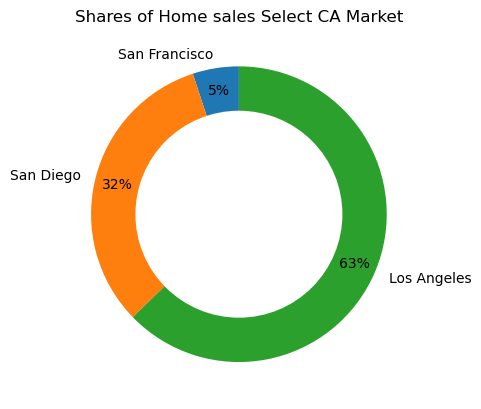

In [53]:
fig, ax = plt.subplots()

ax.pie(
    x = sales_total["total_homes_sold"][::-1],
    startangle=90,
    labels=["San Francisco", "San Diego", "Los Angeles"],
    autopct="%.0f%%",
    explode = (0, 0, 0),
    pctdistance=0.85
    
)

hole = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()

fig.gca().add_artist(hole)

ax.set_title("Shares of Home sales Select CA Market");

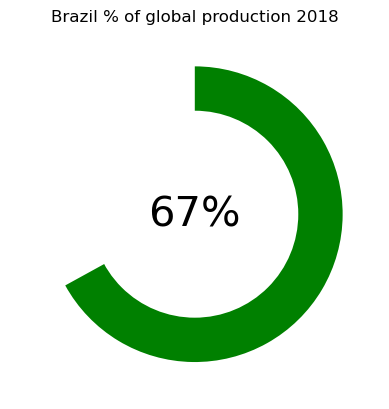

In [51]:
# to create a progress bar using a donut chart

fig, ax = plt.subplots()

ax.pie(
    [.33, .67],
    startangle=90,
#     labels=["", ""],
#     autopct="%.0f%%",
#     explode = (0, 0, 0),
#     pctdistance=0.45,
    colors=["white", "green"]
    
)

hole = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()

fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    "67%",
    ha="center",
    va="center",
    fontsize = 30
)

ax.set_title("Brazil % of global production 2018");